### 概述
- 支持向量机(SVM，也称为支持向量网络)，是机器学习中获得关注最多的算法没有之一。
- 从实际应用来看
    - SVM在各种实际问题中都表现非常优秀。它在手写识别数字和人脸识别中应用广泛，在文本和超文本的分类中举足轻重。同时，SVM也被用来执行图像的分类，并用于图像分割系统。除此之外，生物学和许多其他科学都是SVM的青睐者，SVM现在已经广泛被用于蛋白质分类，现代化合物分类的业界平均水平可以达到90%以上的准确率。在生物科学的尖端研究中，人们还使用支持向量机来识别用于模型预测的各种特征，以找出各种基因表现结果的影响因素。
- 从学术的角度来看
    - SVM是最接近深度学习的机器学习算法。


### 支持向量机的原理
- 支持向量机所作的事情其实非常容易理解。先来看看下面这一组数据的分布，这是一组两种标签的数据，两种标签分别由圆和方块代表。支持向量机的分类方法，是在这组分布中找出一个超平面作为决策边界，使模型在数据上的分类误差尽量接近于0，尤其是在未知数据集上的分类误差尽量小。
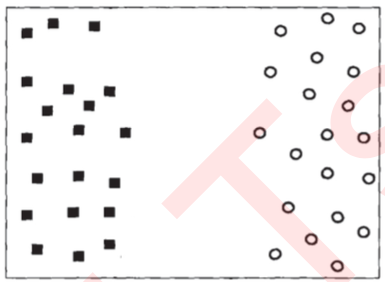

- 超平面
    - 在几何中，超平面是一个空间的子空间，它是维度比所在空间小一维的空间。 如果数据空间本身是三维的， 则其超平面是二维平面，而如果数据空间本身是二维的，则其超平面是一维的直线。 
    - 决策边界：在二分类问题中，如果一个超平面能够将数据划分为两个集合，其中每个集合中包含单独的一个类别，我们就 说这个超平面是数据的“决策边界”。
    - 但是，对于一个数据集来说，让训练误差为0的决策边界可以有无数条。
    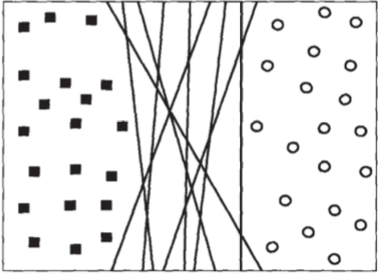

- 决策边界的边际
    - 在上图基础上，我们无法保证这条决策边界在未知数据集(测试集)上的表现也会优秀。对于现有的数据集来说，我们有B1和B2两条可能的决策边界。我们可以把决策边界B1向两边平移，直到碰到离这条决策边界最近的方块和圆圈后停下，形成两个新的超平面，分别是b11和b12，并且我们将原始的决策边界移动到b11和b12的中间，确保B1到b11和b12的距离相等。在b11和b12中间的距离，叫做B1这条决策边界的边际(margin)，通常记作d。
    - 为了简便，我们称b11和b12为“虚线超平面”，大家知道是这两个超平面是由原来的决策边界向两边移动，直到碰到距离原来的决策边界最近的样本后停下而形成的超平面就可以了.
    - 对B2也执行同样的操作，然后我们来对比一下两个决策边界。现在两条决策边界右边的数据都被判断为圆，左边 的数据都被判断为方块，两条决策边界在现在的数据集上的训练误差都是0，没有一个样本被分错。
    - 那么请思考，在测试集中，影响分类效果的因素是什么？
    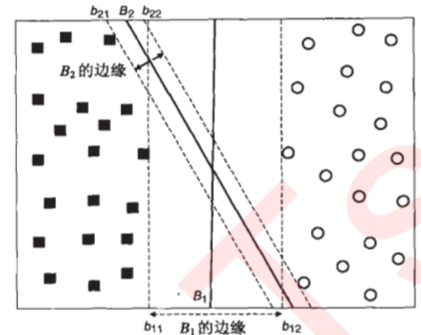


- 决策边界的边际对分类效果的影响
    - 我们引入和原本的数据集相同分布的测试样本(红色所示)，平面中的样本变多了，此时我们可以发现，对于B1而言，依然没有一个样本被分错，这条决策边界上的泛化误差也是0。但是对于B2而言，却有三个方块被误人类成了圆，而有两个圆被误分类成了方块，这条决策边界上的泛化误差就远远大于B1了。
    - 这个例子表现出，拥有更大边际的决策边界在分类中的泛化误差更小。如果边际很小，则任何轻微扰动都会对决策边界的分类产生很大的影响。边际很小的情况，是一种模型在训练集上表现很好，却在测试集上表现糟糕的情况，所以会“过拟合”。
    - 所以我们在找寻决策边界的时候，希望边际越大越好。
    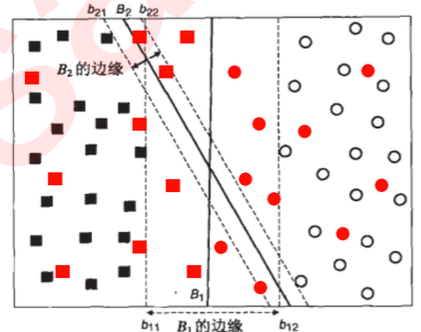

- 支持向量机分类原理
    - 支持向量机，就是通过找出边际最大的决策边界，来对数据进行分类的分类器。也因此，支持向量分类器又叫做最大边际分类器。这个过程在二维平面中看起来十分简单，但将上述过程使用数学表达出来，就不是一件简单的事情了。

### 如何找出边际最大的决策边界
- 假设现在数据集中有N个训练样本，每个训练样本i可以表示为(xi,yi)（i=1,2,3...N）,其中xi是的特征向量维度为二。二分类的标签yi的取值为（1，-1）这两类结果。接下来可视化我们的N个样本数据的特征数据：（紫色为一类，红色为另一类，）
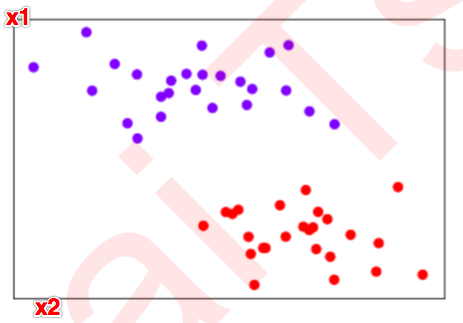

- 我们让所有紫色点的标签为1，红色点的标签为-1。我们要在这个数据集上寻找一个决策边界，在二维平面上，决 策边界(超平面)就是一条直线。二维平面上的任意一条线可以被表示为:


- 我们将表达式变换一下：等号左边-等号右边=0
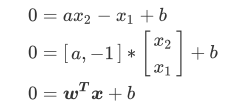
    - 其中[a, -1]就是我们的参数向量 ， X就是我们的特征向量， b是我们的截距。
    - 这个公式也线性回归公式很像，但是线性回归公式等号的左边为我们预测出的结果，而现在的公式表示我们要找出我们的决策边界。

#### 在一组数据下，给定固定的 w和b ，这个式子就可以是一条固定直线，在 w和 b不确定的状况下，这个表达式 就可以代表平面上的任意一条直线。如果在w 和b 固定时，给定一个唯一的 x的取值，这个表达式就可以表示一个固定的点。那么固定下来的直线就可以作为SVM的决策边界。
#### 在SVM中，我们就使用这个表达式来表示我们的决策边界。我们的目标是求解能够让边际 最大化的决策边界，所以我们要求解参数向量 w和截距 b

- 如果在决策边界上任意取两个点xa ，xb ，并带入决策边界的表达式，则有:
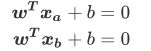

- 将两式相减，可以得到:
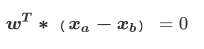
    - 一个向量的转至乘以另一个向量，可以获得两个向量的点积(dot product)。两个向量的点积为0表示两个向量的方向是互相垂直的。这是线性代数中的基础结论！xa与xb是一条直线上的两个点，相减后的得到的向量方向是由xa指向xb，所以xa-xb的方向是平行于他们所在的直线-》我们的决策边界的。而w与xa-xb相互垂直，所以 参数向量w的方向必然是垂直于我们的决策边界。

- 图中任意一个紫色的点xp带入决策边界（x * wt + b = 0）可以表示为：(决策边界的点带入方程返回0，其他点带入后返回大于或者小于0的值)
    - w*xp+b=p
        - 紫色点所表示的标签为y是1，所以我们规定p>0。
- 同样，对于任意一个红色的点xr来讲，我们可以将它表示为：
    - w*xr+b=r
        - 红色点所表示的标签y是-1，所以我们规定r<0。
- 此时，我们如果有新的测试数据xt，则的 标签就可以根 据以下式子来判定:
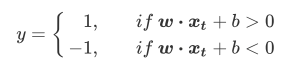

- 我们之前说过，决策边界的两边要有两个超平面，这两个超平面在二维空间中就是两条平行线(就是我们的虚线超平面)，而他们之间的距离就是我们的边际d。而决策边界位于这两条线的中间，所以这两条平行线必然是对称的。我们另这两条平行线被表示为:
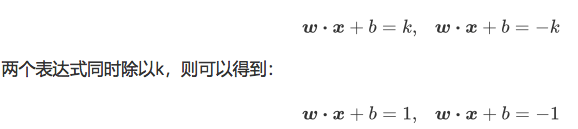
- 支持向量：    
    - 此时，我们可以让这两条线分别过两类数据中距离我们的虚线决策边界最近的点，这些点就被称 为“支持向量”，而决策边界永远在这两条线的中间。我们令紫色类的点为xp，红色类的点为xr（xp和xr作为支持向量）， 则我们可以得到:

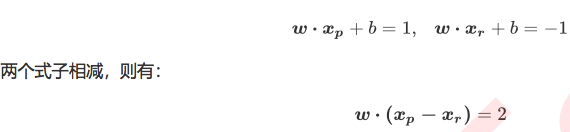


- 如下图所示，（xp-xr）可表示为两点之间的连线(距离)，而我们的边际d是平行于w的，所以我们现在，相当于是得到了三角型中的斜边，并且知道一条直角边的方向。在线性代数中，我们有如下数学性质:
    - 向量a乘以向量b方向上的单位向量，可以得到向量a在向量b方向上的投影的长度。
        - xp-xr作为向量a，则w作为向量b，则可以求出边际的长度
    - 向量b除以自身的模长||b||可以得到b方向上的单位向量。
    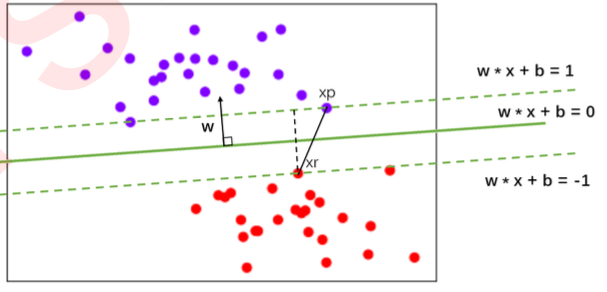

- 所以，我们将上述式子两边除以||w||，可以得到：
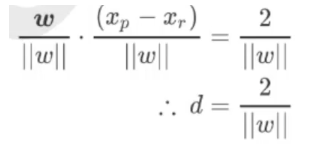

- 还记得我们想求什么吗?最大边界所对应的决策边界，那问题就简单了，要最大化d，就求解w的最小值。我们可以把求解 的最小值转化为，求解以下函数的最小值:
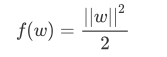
    - 只所以要在模长上加上平方，是因为模长的本质是一个距离（距离公式中是带根号的），所以它是一个带根号的存在，我们对它取平方，是为了消除根号，不带平方也可以。

- 我们的两条虚线表示的超平面，表示的是样本数据边缘所在的点。所以对于任意样本i，我们可以把决策函数写作:
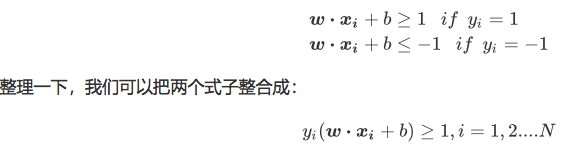
     - 如果w*xi+b>=1，yi=1则yi(w*xi+b)的值一定是>=1的，如果w*xi+b<=-1，yi=-1则yi(w*xi+b)的值也一定是>=1的。

### 至此，我们就得到了支持向量机的损失函数：
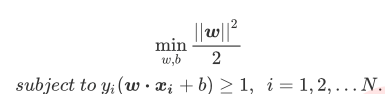


### 拉格朗日乘数
- 有了我们的损失函数过后，我们就需要对损失函数进行求解。我们的目标是求解让损失函数最小化的w，但其实很容易看得出来，如果||w||为0，f(w)必然最小了。但是,||w||=0其实是一个无效的值，原因有简单:首先，我们的决策边界是wx+b=0 ，如果w 为0，则这个向量里包含的所有元素都为0，那就有b = 0这个唯一值。然而，如果b和w都为0，决策边界就不再是一条直线了，条件中的yi(wxi+b)>=1就不可能实现，所以w不可以是一个0向量。可见，单纯让f(w)=||w||**2/2 为0，是不能求解出合理的w的，我们希望能够找出一种方式，能够让我们的条件yi(wxi+b)>=1在计算中也被纳入考虑，一种业界认可的方法是使用拉格朗日乘数法。
- 拉格朗日乘数涉及到的数学的难度不是推导损失函数的部分可比。并且，在sklearn当中，我们作为使用者完全无法干涉这个求解的过程。因此作为使用sklearn的人，这部分属内容可以忽略不计。

### 非线性SVM与核函数
- 当然，不是所有的数据都是线性可分的，不是所有的数据都能一眼看出，有一条直线，或一个平面，甚至一个超平面可以将数据完全分开。比如下面的环形数据。对于这样的数据，我们需要对它进行一个升维变化，让数据从原始的空间x投射到新空间q(x)中。升维之后，我们明显可以找出一个平面，能够将数据切分开来。 
    - q(x)是一个映射函数，它代表了某种能够将数据升维的非线性的变换，我们对数据进行这样的变换，确保数据在自己的空间中一定 能够线性可分。
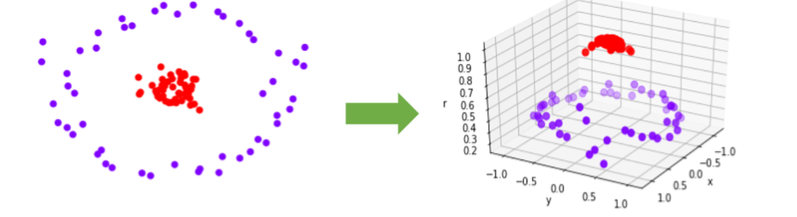

- 核函数
    - 上述这种手段是有问题的，我们很难去找出一个函数q(x)来满足我们的需求，并且我们并不知道数据究竟被映射到了一个多少维度的空间当中，有可能数据被映射到了无限空间中，让我们的计算和预测都变得无比艰难。所以无法统一定义一个固定的q(x)函数。为了避免这些问题，我们使用核函数来帮助我们。
    - 核函数K(xi,xtest)能够用原始数据空间中的向量计算来表示升维后地空间中的点积q(x)*q(xtest)，以帮助我们寻找合适的q(x)。选用不同的核函数，就可以解决不同数据分布下的寻找超平面问题。
    - 在sklearn的SVM中，这个功能由参数“kernel”(ˈkərnl)和一系列与核函数相关的参数来进行控制.因此我们更加重视不同的核函数选择对模型产生的影响是什么，而不是搞明白核函数的推导原理。

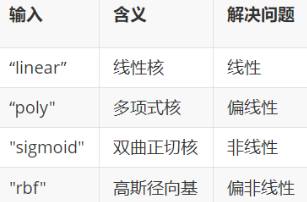

- 探索核函数在不同数据集上的表现
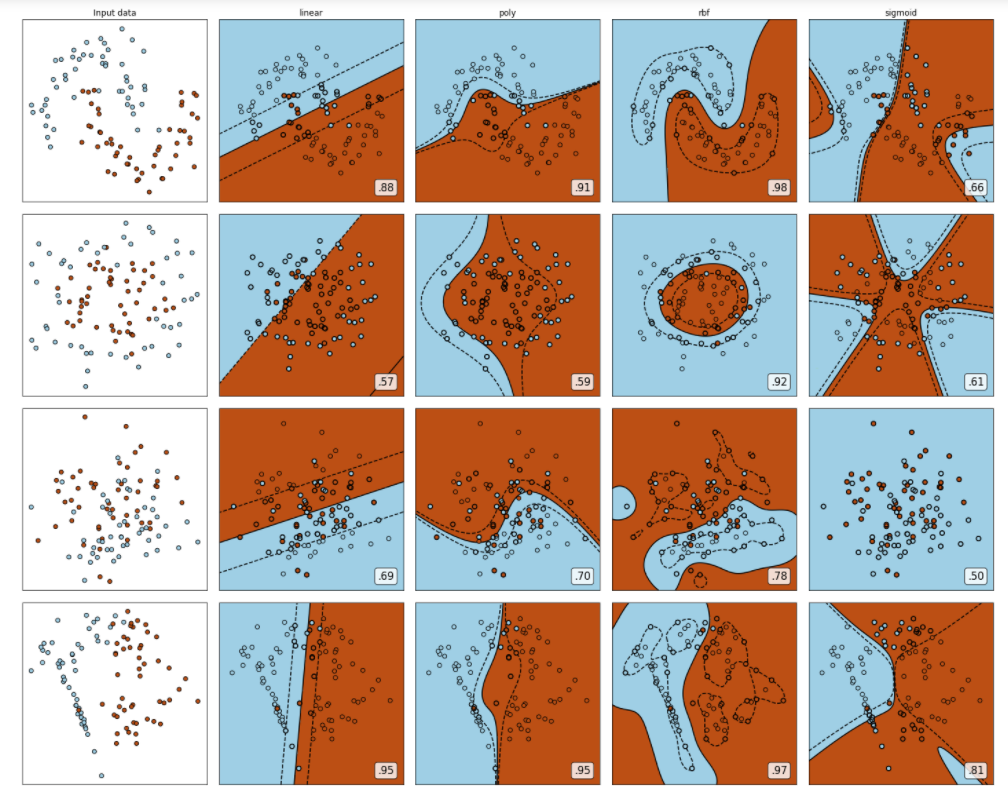

- 观察结果
    - 可以观察到，线性核函数和多项式核函数在非线性数据上表现会浮动，如果数据相对线性可分，则表现不错，如果是像环形数据那样彻底不可分的，则表现糟糕。在线性数据集上，线性核函数和多项式核函数即便有扰动项也可以表现不错，可见多项式核函数是虽然也可以处理非线性情况，但更偏向于线性的功能。
    - Sigmoid核函数就比较尴尬了，它在非线性数据上强于两个线性核函数，但效果明显不如rbf，它在线性数据上完全 比不上线性的核函数们，对扰动项的抵抗也比较弱，所以它功能比较弱小，很少被用到。
    - rbf，高斯径向基核函数基本在任何数据集上都表现不错，属于比较万能的核函数。我个人的经验是，无论如何先 试试看高斯径向基核函数，它适用于核转换到很高的空间的情况，在各种情况下往往效果都很不错，如果rbf效果 不好，那我们再试试看其他的核函数。另外，多项式核函数多被用于图像处理之中。

#### 硬间隔与软间隔
当两组数据是完全线性可分，我们可以找出一个决策边界使得训练集上的分类误差为0，这两种数据就被称为 是存在”硬间隔“的。

当两组数据几乎是完全线性可分的，但决策边界在训练集上存在较小的训练误差，这两种 数据就被称为是存在”软间隔“。

我们可以通过调整我们对决策边界的定义，将硬间隔时得出的数学结论推广到软间隔的情况上，让决策边界能够忍 受一小部分训练误差。这个时候，我们的决策边界就不是单纯地寻求最大边际了，因为对于软间隔地数据来说，边 际越大被分错的样本也就会越多，因此我们需要找出一个”最大边际“与”被分错的样本数量“之间的平衡。

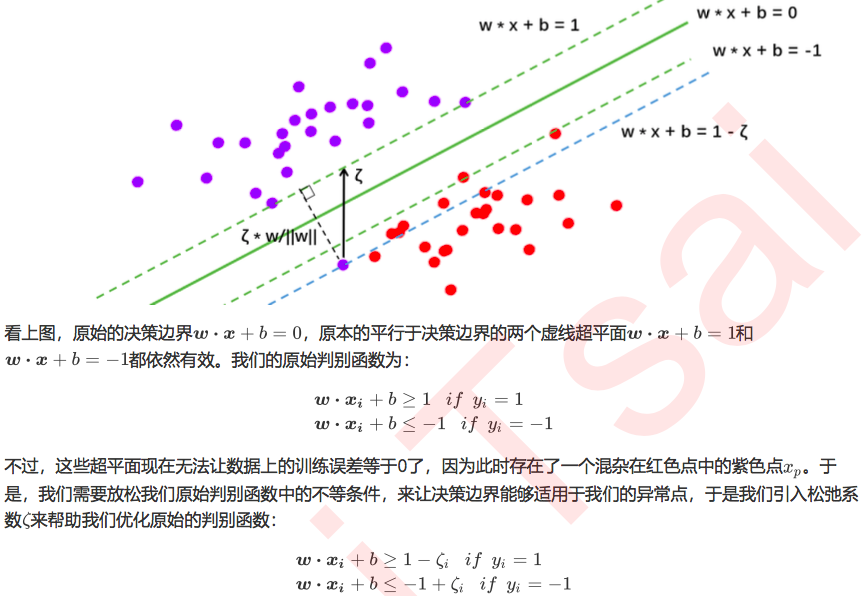

其中松弛系数大于0，可以看得出，这其实是将原本的虚线超平面向图像的上方和下方平移。

松弛系数其实也比较容易理解，来看上面的图像：位于红色点附近的紫色点xp在原本的判别函数中必定会被分为红色，所以一定会被判断错。现在我们作一条与决策边界平行,但是过点xp的直线w * xi + b = 1-松弛系数（图中蓝色虚线），这条直线其实就是w * x + b = 1这条直线平移得到的。所以两条直线（w * x + b = 1和w * xi + b = 1-松弛系数）在纵坐标（垂直y轴）上的差异就是松弛系数（图中竖直的黑色箭头）

因此，上图中的黑色箭头（松弛系数）可以作为点xp在原始的决策边界上的分类错误的程度的表示，隔得越远，分得越错！

- 那我们是否可以直接将上图中平移下来的蓝色虚线（w * xi + b = 1-松弛系数）作为新的决策边界呢？
    - 不可以，虽然我们把异常的紫色点分类正确了，但我们同时也分错了一系列红色的点。所以我们必须在我们求解最大边际的损失函数中加上一个惩罚项，用来惩罚（调整）我们具有巨大松弛系数的决策超平面（追求松弛系数小的决策边界）。
    - 调整的过程不做解释。
    - 其中模型参数C是用来控制惩罚项的惩罚力度的系数

- 模型参数：from sklearn.svm import SVC

    - kernel：选择核函数
    - C：正则化力度，处理过拟合。
    - class_weight：类别分布不均衡处理

### SVM的实战-乳腺癌数据

- 问题：如何知道我们的数据集到底是线性可分的还是线性不可分的呢？因为我们需要为此选择不同的核函数。
- 处理：初步任意选取两种特征，将其映射在散点图中查看是否线性可分。

- 将linear和rbf以此作用到模型中查看结果

- 我们之前的 实验中，我们了解说，rbf在线性数据上也可以表现得非常好，那在这里，为什么跑出来的结果如此糟糕呢?
    - 分析数据集的数据分布情况desrib

- 通过观察特征数据的标准差，最大，最小值发现特征中的数据分布很不均衡，则试着对其进行归一化处理

- 发现rbf的分数提高了
    - 结论：rbf不擅长处理数据分布不均衡的数据。

### SVM的实战-实现人脸识别

In [1]:
#我们这次筛选的数据来自sklearn的datasets的fetch_olivetti_faces()
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/bobo/scikit_learn_data


In [2]:
#通过faces.images就是人脸对应的图像数组，我们先来看下shape：
faces.images.shape

(400, 64, 64)

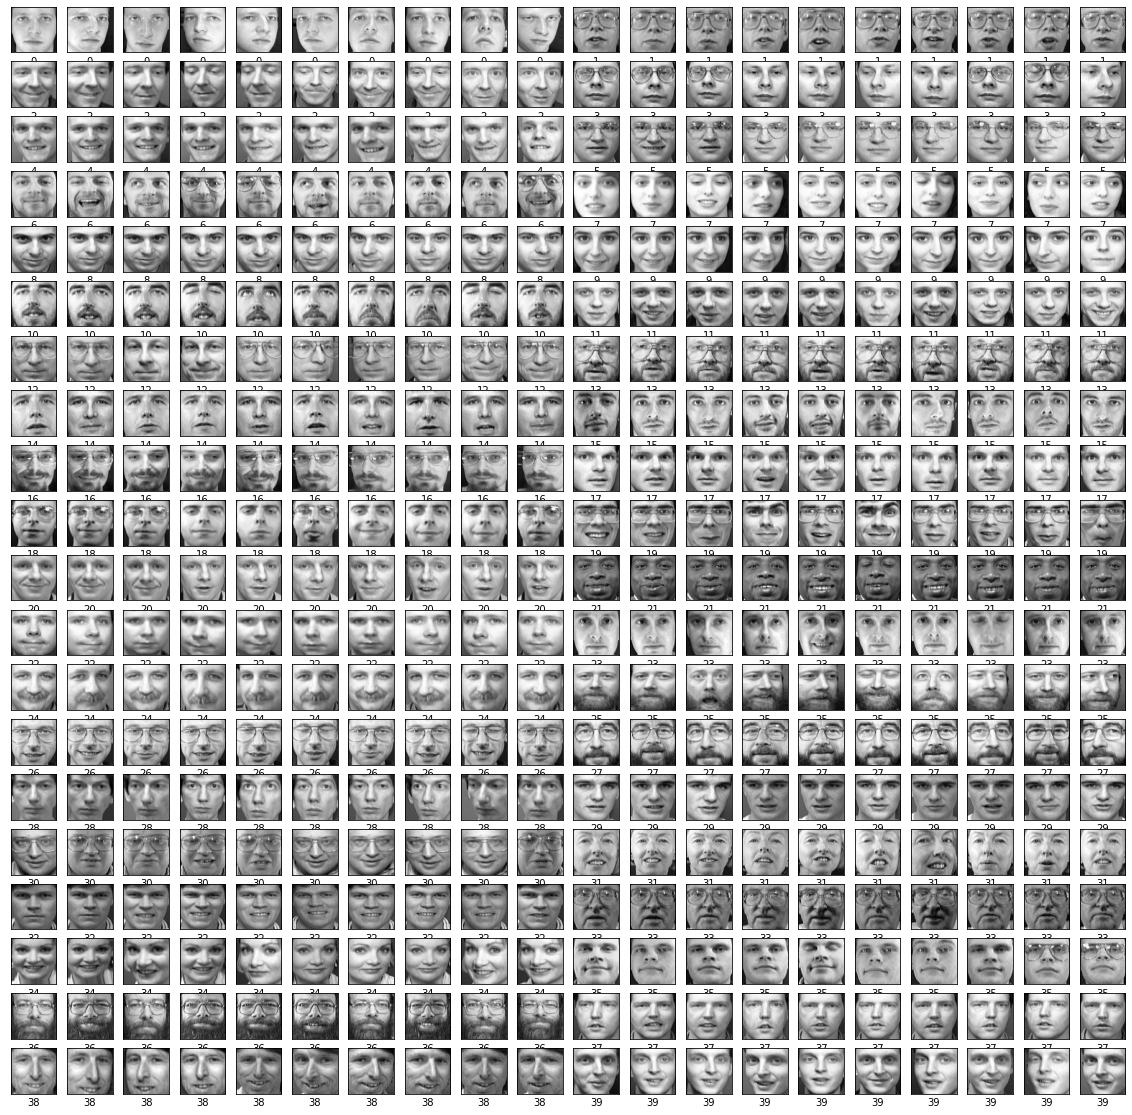

In [4]:
#我们通过matplotlib来显示出这些图片到一张图中
from matplotlib import pyplot as plt
%matplotlib inline
i = 0
plt.figure(figsize=(20, 20))
for img in faces.images:
    #总共400张图，把图像分割成20X20
    plt.subplot(20, 20, i+1)
    plt.imshow(img, cmap="gray")
    #关闭x，y轴显示
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(faces.target[i])
    i = i + 1
plt.show()
